Small notebook running scripts for calculating entropy

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")
from entropy import plots
import os
import pandas as pd

In [21]:
def get_plots(paths, languages, save_path, only_words=True):
    chars_entropies = []
    words_entropies = []
    
    for outcome_path in paths:
        entropy = pd.read_csv(outcome_path)
        chars_entropy, words_entropy = list(entropy['characters']), list(entropy['words'])
        
        chars_entropies.append(chars_entropy)
        words_entropies.append(words_entropy)
    #print(len(words_entropies))   
    if only_words:
        plots.get_words_plot(words_entropies , languages=languages, marker=None,save_path=save_path)
    else:
        plots.get_plot(chars_entropies, words_entropies , languages=languages, marker=None,save_path=save_path)

In [22]:
def check(path, genres):
    for g in genres:
        if g in path:
            return True
    return False

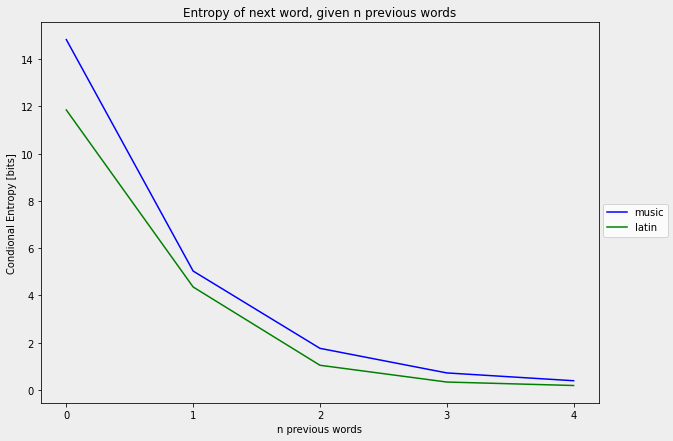

In [33]:
PATH = "entropy_outcomes"
get_plots([os.path.join(PATH,"entropy_merged.csv"), os.path.join(PATH,"entropy_norm_wiki_la.csv")], ["music", "latin"], save_path="./latin_vs_music_words_only.png")

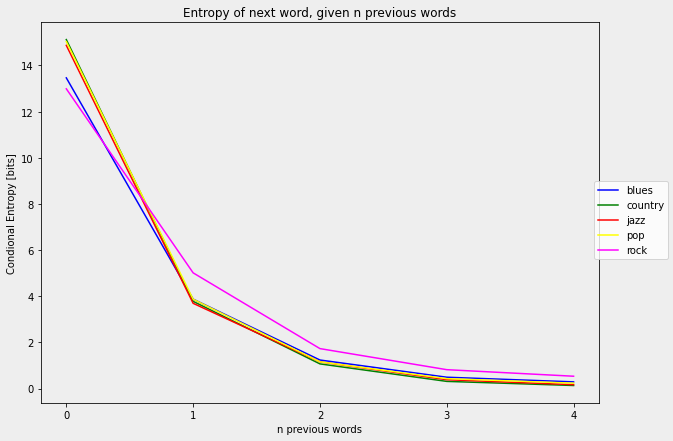

In [39]:
PATH = "entropy_outcomes"
genres = ["blues", "country","jazz", "pop", "rock"]
directories = [os.path.join(PATH,d) for d in os.listdir(PATH) if check(d, genres)]
get_plots(directories, genres, save_path="./genres_comparison_words_only.png")

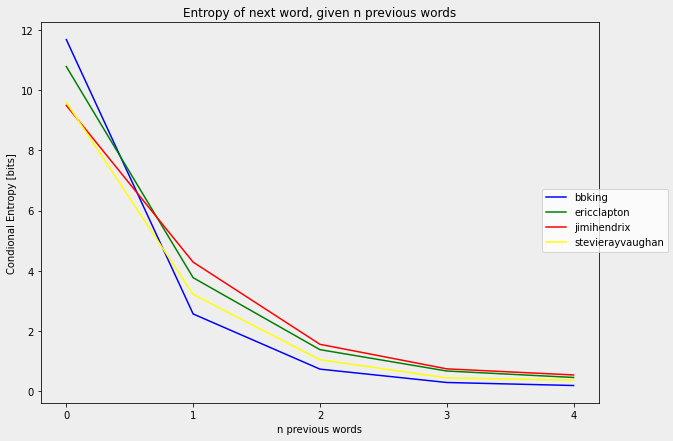

In [35]:
PATH = "entropy_outcomes"
genres = ["bbking", "ericclapton","jimihendrix","stevierayvaughan"]
directories = [os.path.join(PATH,d) for d in os.listdir(PATH) if check(d, genres)]
get_plots(directories, genres, save_path="./artists_comparison_words_only.png")

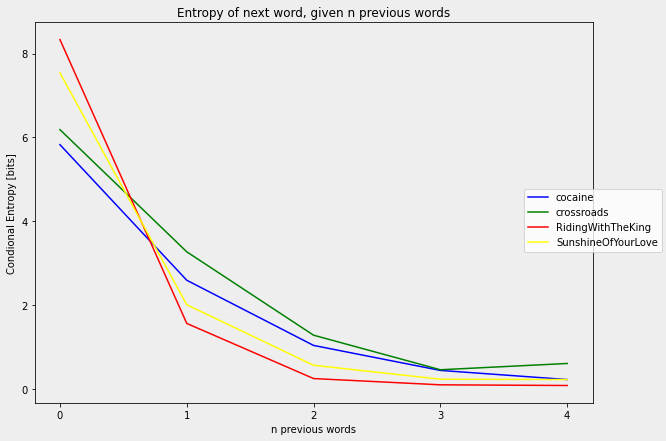

In [36]:
def check(path, genres):
    for g in genres:
        if g in path:
            return True
    return False

PATH = "entropy_outcomes"
genres = ["cocaine", "crossroads","RidingWithTheKing","SunshineOfYourLove"]
directories = [os.path.join(PATH,d) for d in os.listdir(PATH) if check(d, genres)]
get_plots(directories, genres, save_path="./clapton_comparison_words_only.png")